In [1]:
from Model_data_preparation import ModelDataInput, NoduleData
from Model_classification import ModelClassification

In [2]:
base_root = "C:/Users/Aidan/Tue/5ARIP10/Demcon_Data"
folders = {
    "20241221_074106/20241221_074106/LIDC-IDRI",
    "20241223_164057/20241223_164057/LIDC-IDRI",
    "20250104_064120/20250104_064120/LIDC-IDRI",
    "20250105_082554/20250105_082554/LIDC-IDRI"
}

In [3]:
import os
import pandas as pd
all_dataframes = []

for folder in folders:
    full_path = os.path.join(base_root, folder)
    print(f"Processing: {full_path}")
    
    data = NoduleData(full_path)
    data.extract_data()
    df = data.to_dataframe()
    all_dataframes.append(df)
combined_df = pd.concat(all_dataframes, ignore_index=True)

Processing: C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\20250104_064120/20250104_064120/LIDC-IDRI
Processing: C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\20241221_074106/20241221_074106/LIDC-IDRI
Processing: C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\20250105_082554/20250105_082554/LIDC-IDRI
Processing: C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\20241223_164057/20241223_164057/LIDC-IDRI


In [4]:
len(combined_df)

1487

In [5]:
combined_df.head()

,nodule_name,nodule_category,calcification,internal_structure,lobulation,margin,nodule_type,sphericity,texture,global_seed,slice_thickness,slices_present,file_path
0,Adenoid Cystic Carcinoma,Malignant,Absent,Soft Tissue,None-M,Poo-Sh,m8,Ovoid,Part Solid/Mixed,7454.7391,2.50,"[52, 53, 54, 55, 56]",C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\2025010...
1,Carcinoid Tumors,Malignant,Absent,Soft Tissue,Nn-Mk,P-Sharp,m5,Ov-Ro,Solid,20538.7077,2.50,"[43, 44, 45]",C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\2025010...
2,Sarcomatoid Carcinoma,Malignant,Absent,Soft Tissue,Nn-Mk,Poorly,m6,Lin-Ov,Part Solid/Mixed,20133.7427,2.50,"[53, 54, 55, 56]",C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\2025010...
3,Bronchioloalveolar Hyperplasia,Benign,Absent,Soft Tissue,Nn-Mk,Poorly-S,b5,Ov-Ro,NS-PS,444.1777,1.25,"[44, 45, 46, 47, 48, 49]",C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\2025010...
4,Metastatic Tumors,Malignant,Absent,Soft Tissue,None,Sharp,m9,Ov-Ro,Solid,19244.0979,2.50,"[17, 18, 19]",C:/Users/Aidan/Tue/5ARIP10/Demcon_Data\2025010...


## the following code only works with a model trained with Local_context_residualLayer altv2.ipynb

In [2]:
json_path = r"C:\Users\Aidan\Tue\5ARIP10\Demcon_Data\20241221_074106\20241221_074106\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-02684\1115371.000000-NA-34253\segmentation_00001.json"
local_path = r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\nodules\LIDC-IDRI-0001"
context_path = r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\lungs\LIDC-IDRI-0001"


# change the 3 paths to the absolute paths on your machine, and change the naming_method to: "Pipeline". For NoduleLIDC-IDRI-0010_1-0054.dcm naming pattern
local = ModelDataInput(json_path=json_path,scan_path=local_path, local_or_context="Local",naming_method="Aidan")
context = ModelDataInput(json_path=json_path,scan_path=context_path, local_or_context="Context",naming_method="Aidan")

In [3]:
local.get_radiomics()
context.get_radiomics()

In [4]:
ev = ModelClassification(modelpkl="triple_fusion_model_altdifflossv4.pkl",volume_local=local.volume_local, volume_context= context.volume_context, radiomics= local.radiomics, labels= local.labels)

In [5]:
ev.get_result()

True: Lymphoma, Top-1: Lymphoma (79.5%), Top-2: Sarcomatoid Carcinoma (9.1%), Top-3: Adenocarcinoma (3.4%)


In [7]:
json_path = [r"C:\Users\Aidan\Tue\5ARIP10\Demcon_Data\20241221_074106\20241221_074106\LIDC-IDRI\LIDC-IDRI-0000\01-01-2000-NA-NA-02587\3976134.000000-NA-94964\segmentation_00000.json",
    r"C:\Users\Aidan\Tue\5ARIP10\Demcon_Data\20241221_074106\20241221_074106\LIDC-IDRI\LIDC-IDRI-0001\01-01-2000-NA-NA-02684\1115371.000000-NA-34253\segmentation_00001.json",r"C:\Users\Aidan\Tue\5ARIP10\Demcon_Data\20241221_074106\20241221_074106\LIDC-IDRI\LIDC-IDRI-0005\01-01-2000-NA-NA-03072\1264842.000000-NA-37425\segmentation_00005.json",r"C:\Users\Aidan\Tue\5ARIP10\Demcon_Data\20241221_074106\20241221_074106\LIDC-IDRI\LIDC-IDRI-0024\01-01-2000-NA-NA-04916\1539674.000000-NA-43258\segmentation_00024.json",
             r"C:\Users\Aidan\Tue\5ARIP10\Demcon_Data\20250104_064120\20250104_064120\LIDC-IDRI\LIDC-IDRI-0016\01-01-2000-NA-NA-04141\2210326.000000-NA-57490\segmentation_00016.json"]
local_path = [r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\nodules\LIDC-IDRI-0000",r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\nodules\LIDC-IDRI-0001",r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\nodules\LIDC-IDRI-0005",r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\nodules\LIDC-IDRI-0024",
              r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20250104_064120\nodules\LIDC-IDRI-0016"]
context_path = [r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\lungs\LIDC-IDRI-0000",r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\lungs\LIDC-IDRI-0001",r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\lungs\LIDC-IDRI-0005",r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20241221_074106\lungs\LIDC-IDRI-0024",
                r"C:\Users\Aidan\Tue\5ARIP10\Segmented\20250104_064120\lungs\LIDC-IDRI-0016"]
for i in range(3):
    local = ModelDataInput(json_path=json_path[i],scan_path=local_path[i], local_or_context="Local",naming_method="Aidan")
    context = ModelDataInput(json_path=json_path[i],scan_path=context_path[i], local_or_context="Context",naming_method="Aidan")

    local.get_radiomics()
    context.get_radiomics()
    ev = ModelClassification(modelpkl="triple_fusion_model_altdifflossv3.pkl",volume_local=local.volume_local, volume_context= context.volume_context, radiomics= local.radiomics, labels= local.labels)
    ev.get_result()


True: Small Cell Lung Cancer (SCLC), Top-1: Small Cell Lung Cancer (SCLC) (74.8%), Top-2: Adenocarcinoma (13.2%), Top-3: Large Cell (Undifferentiated) Carcinoma (5.1%)
True: Lymphoma, Top-1: Lymphoma (52.2%), Top-2: Adenoid Cystic Carcinoma (36.5%), Top-3: Sarcomatoid Carcinoma (5.3%)
True: Adenoid Cystic Carcinoma, Top-1: Adenoid Cystic Carcinoma (88.3%), Top-2: Lymphoma (4.3%), Top-3: Active Infection (4.0%)


In [3]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [100]:
target_layer = ev.model.context_branch.conv[4] # the second Conv3D layer

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [101]:
import torch
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Convert numpy to tensor if needed and ensure dtype and device
input_tensor = torch.from_numpy(context.volume_context).float().to(device)

# Ensure it has shape [B, C, D, H, W]
if input_tensor.ndim == 4:
    input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension

# Process target label
target_category = context.labels.item() if isinstance(context.labels, torch.Tensor) else int(context.labels)

# Initialize Grad-CAM
cam = GradCAM(model=ev.model.context_branch, target_layers=[target_layer])

# Run Grad-CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=[ClassifierOutputTarget(target_category)])



C:\Users\Aidan\AppData\Local\Temp\ipykernel_1660\3803968854.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  target_category = context.labels.item() if isinstance(context.labels, torch.Tensor) else int(context.labels)


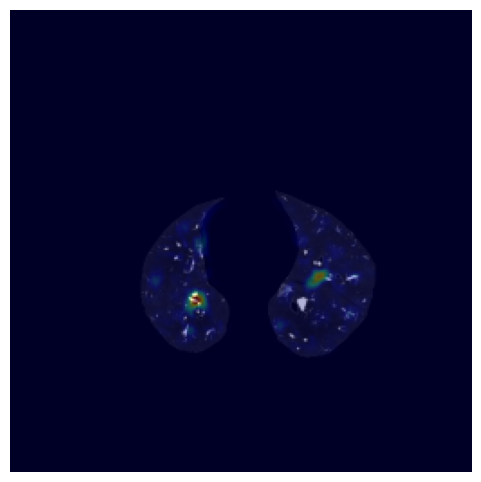

In [102]:
# Visualize the heatmap 
import cv2
import numpy as np
import matplotlib.pyplot as plt


def normalize(x):
    x = x - x.min()
    x = x / (x.max() + 1e-5)
    return x

volume = context.volume_context[0]
grayscale = grayscale_cam[0]                                    

# Take the middle slice
mid = volume.shape[0] // 2
slice_img = normalize(volume[mid])
cam_slice = normalize(grayscale[mid])

if cam_slice.shape != slice_img.shape:
    cam_slice = cv2.resize(cam_slice, slice_img.shape[::-1])

# Convert CAM to heatmap
cam_uint8 = np.ascontiguousarray((cam_slice * 255).astype(np.uint8))
heatmap = cv2.applyColorMap(cam_uint8, cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB) / 255.0

# Prepare grayscale CT image
ct_rgb = np.stack([slice_img] * 3, axis=-1)

overlay = 0.7 * ct_rgb + 0.3 * heatmap

plt.figure(figsize=(6, 6))
plt.imshow(overlay)
plt.axis("off")
plt.show()

In [106]:
target_layer = ev.model.local_branch.resblock1  # the second Conv3D layer

In [107]:
import torch
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# Convert numpy to tensor if needed and ensure dtype and device
input_tensor = torch.from_numpy(local.volume_local).float().to(device)

# Ensure it has shape [B, C, D, H, W]
if input_tensor.ndim == 4:
    input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension

# Process target label
target_category = local.labels.item() if isinstance(local.labels, torch.Tensor) else int(local.labels)

# Initialize Grad-CAM
cam = GradCAM(model=ev.model.local_branch, target_layers=[target_layer])

# Run Grad-CAM
grayscale_cam = cam(input_tensor=input_tensor, targets=[ClassifierOutputTarget(target_category)])



C:\Users\Aidan\AppData\Local\Temp\ipykernel_1660\2056981696.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  target_category = local.labels.item() if isinstance(local.labels, torch.Tensor) else int(local.labels)


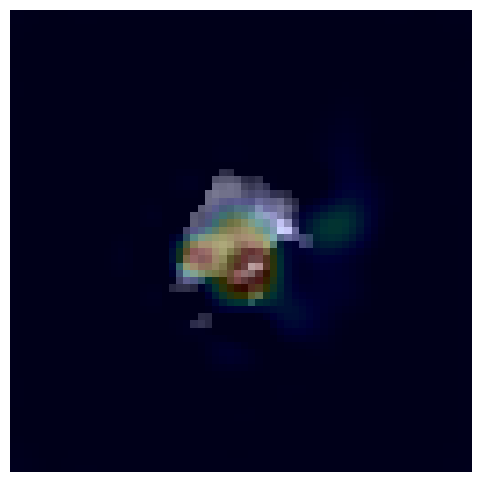

In [108]:
# Visualize the heatmap 
import cv2
import numpy as np
import matplotlib.pyplot as plt


def normalize(x):
    x = x - x.min()
    x = x / (x.max() + 1e-5)
    return x

volume = local.volume_local[0]
grayscale = grayscale_cam[0]                                    

# Take the middle slice
mid = volume.shape[0] // 2
slice_img = normalize(volume[mid])
cam_slice = normalize(grayscale[mid])

if cam_slice.shape != slice_img.shape:
    cam_slice = cv2.resize(cam_slice, slice_img.shape[::-1])

# Convert CAM to heatmap
cam_uint8 = np.ascontiguousarray((cam_slice * 255).astype(np.uint8))
heatmap = cv2.applyColorMap(cam_uint8, cv2.COLORMAP_JET)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB) / 255.0

# Prepare grayscale CT image
ct_rgb = np.stack([slice_img] * 3, axis=-1)

overlay = 0.8 * ct_rgb + 0.2 * heatmap

plt.figure(figsize=(6, 6))
plt.imshow(overlay)
plt.axis("off")
plt.show()